In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
#Intializations
np.random.seed(1)
eta = .01
n_iter = 50


In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']



As we only want to perfrom a binary classification, lets drop class 1 (Iris-versicolor). 

In [3]:
df = df.loc[df['target']!=1]


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

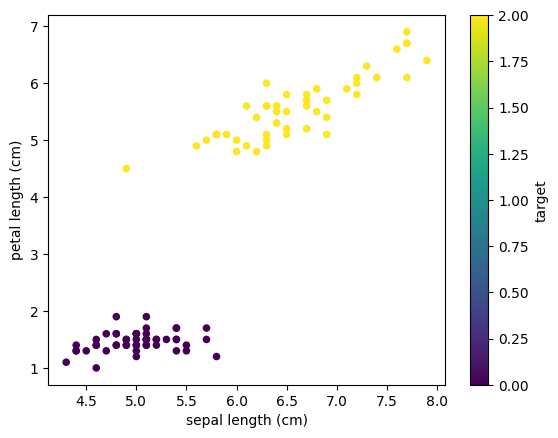

In [84]:
#Now lets see what our data looks like
df.plot.scatter(x='sepal length (cm)', y='petal length (cm)',c='target',colormap='viridis')

Now lets change the data to make it a little easier to work with. First, we will change the target to 1 (Iris-virginica) and -1 (Iris-setosa). Lets also only keep the length data and rename it. 

In [4]:
df['target'] = np.where(df['target']==2, 1, -1)
df = df[['sepal length (cm)','petal length (cm)','target']]
df = df.rename(columns = {'sepal length (cm)':'sepal','petal length (cm)':'petal'})

In [29]:
m=np.random.RandomState(1)
x = df[['sepal','petal']].values
y = df['target'].values
w = m.normal(loc=0.0, scale=0.01,size=1 + x.shape[1])
error = 0

def predict(X,W):
    np.where(np.dot(X,W[1:])+W[0] >= 0.0,1,-1)

for i in range(n_iter):
    errors = []
    for xi, target in zip(x,y):
        update = eta * (target -predict(xi,w))
        w[1:] += update *xi
        w[0] += update
        error += int(update != 0.0)
    errors.append(error)


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [30]:
np.where(np.dot(xi,w[1:])+w[0] >= 0.0,1,-1)

array(-1)

In [19]:
eta * (target -predict(xi,w))

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [17]:
eta

0.01

In [148]:
np.dot(xi,w[1:])+w[0]

0.019781845942398457

In [130]:
w[1:]

array([-0.00775189,  0.01383847])